In [1]:
import numpy as np
import matplotlib as mat
import os
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv
import multivelo as mv

Global seed set to 0


In [4]:
scv.__version__

'0.3.1'

In [2]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
np.set_printoptions(suppress=True)

In [7]:
#Preprocessing the ATAC 
#sampleID = ['Gan45','Gan47','Gan48','Gan49','Gan50','Gan60','Gan61','Gan62','Gan63','Gan64','Gan66']
sampleID = ['Gan60','Gan61','Gan62','Gan63','Gan64','Gan66']

i = 0
for sample in sampleID: 
    i = i+1
    matrix_path = f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/filtered_feature_bc_matrix/'
    print(f'reading ATAC input from the mtx path : {matrix_path}')
    adata_atac = sc.read_10x_mtx(matrix_path, var_names='gene_symbols', cache=True, gex_only=False)
    adata_atac = adata_atac[:,adata_atac.var['feature_types'] == "Peaks"]
    adata_atac = mv.aggregate_peaks_10x(adata_atac,
                                    f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/peak_annotation.tsv',
                                    f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/analysis/feature_linkage/feature_linkage.bedpe',
                                    verbose=True)
    mv.tfidf_norm(adata_atac)
    # subset the annotated cells from ATAC assay 
    cell_anno_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/{sample}_celltype_annotation.txt'
    cell_annot = pd.read_csv(cell_anno_path,sep = "\t",index_col=0)
    shared_cells_anno = pd.Index(np.intersect1d(adata_atac.obs_names, cell_annot.index))
    adata_atac = adata_atac[shared_cells_anno,:]
       adata_atac.obs_names = [f'{sample}_' + x for x in adata_atac.obs_names]
    adata_atac.var_names_make_unique()
      if i == 1: adata_atac_all = adata_atac
   
    if i > 1:
        adata_atac_all = adata_atac_all.concatenate(adata_atac)

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan60/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 19254 genes with promoter peaks


  0%|          | 0/19254 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan61/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 17532 genes with promoter peaks


  0%|          | 0/17532 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan62/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 19317 genes with promoter peaks


  0%|          | 0/19317 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan63/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 18285 genes with promoter peaks


  0%|          | 0/18285 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan64/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 19252 genes with promoter peaks


  0%|          | 0/19252 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan66/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 16995 genes with promoter peaks


  0%|          | 0/16995 [00:00<?, ?it/s]

sample

In [8]:
adata_atac_all

AnnData object with n_obs × n_vars = 32625 × 15592
    obs: 'batch'

In [9]:
adata_atac_all.obs

,batch
Gan60_AAACAGCCAATTTAGC-1-0-0-0-0-0,0
Gan60_AAACAGCCACGTGCTG-1-0-0-0-0-0,0
Gan60_AAACATGCAATGAAGC-1-0-0-0-0-0,0
Gan60_AAACCAACAAAGCGCA-1-0-0-0-0-0,0
Gan60_AAACCAACACTTCATC-1-0-0-0-0-0,0
...,...
Gan66_TTTGTTGGTCAGGCCA-1-1,1
Gan66_TTTGTTGGTCTTGCAT-1-1,1
Gan66_TTTGTTGGTTACGCGG-1-1,1
Gan66_TTTGTTGGTTGAAGCC-1-1,1


In [10]:
### rename the index (cellid) after concatenation
adata_atac_all.obs_names = [x.split('-')[0][:] + '-1' for x in adata_atac_all.obs_names]

In [11]:
adata_atac_all.obs

,batch
Gan60_AAACAGCCAATTTAGC-1,0
Gan60_AAACAGCCACGTGCTG-1,0
Gan60_AAACATGCAATGAAGC-1,0
Gan60_AAACCAACAAAGCGCA-1,0
Gan60_AAACCAACACTTCATC-1,0
...,...
Gan66_TTTGTTGGTCAGGCCA-1,1
Gan66_TTTGTTGGTCTTGCAT-1,1
Gan66_TTTGTTGGTTACGCGG-1,1
Gan66_TTTGTTGGTTGAAGCC-1,1


In [12]:
adata_atac_all.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_6controls_adata_ATAC_raw.h5ad')

In [13]:
#sampleID = ['Gan45','Gan47','Gan48','Gan49','Gan50','Gan60','Gan61','Gan62','Gan63','Gan64','Gan66']
sampleID = ['Gan60','Gan61','Gan62','Gan63','Gan64','Gan66']
i = 0
for sample in sampleID: 
    i = i+1
    loom_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_11samples_loom/{sample}.loom'
    cell_anno_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/{sample}_celltype_annotation.txt'
    print(f'loom file path is {loom_path}')
    print(f'cell annotation file path is {cell_anno_path}')
    adata_rna = scv.read(loom_path, cache=True)
    adata_rna.obs_names = [x.split(':')[1][:-1] + '-1' for x in adata_rna.obs_names]
    cell_annot = pd.read_csv(cell_anno_path,sep = "\t",index_col=0)
    ## subset annotated cells from RNA assay
    shared_cells_anno = pd.Index(np.intersect1d(adata_rna.obs_names, cell_annot.index))
    adata_rna = adata_rna[shared_cells_anno,:]
    ## assign celltypes
    adata_rna.obs['celltype'] = cell_annot['celltype']
    ### rename cells with sampleID
    adata_rna.obs_names = [f'{sample}_' + x for x in adata_rna.obs_names]
    adata_rna.var_names_make_unique()

    if i == 1: adata_rna_all = adata_rna
   
    if i > 1:
        adata_rna_all = adata_rna_all.concatenate(adata_rna)


loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_11samples_loom/Gan60.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan60_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_11samples_loom/Gan61.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan61_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_11samples_loom/Gan62.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan62_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_11samples_loom/Gan63.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan63_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_11samples_loom/Gan64.loom
cell annotation file path is /athena/tilgnerlab/scratch/we

In [15]:
adata_rna_all.obs_names

Index(['Gan60_AAACAGCCAATTTAGC-1-0-0-0-0-0',
       'Gan60_AAACAGCCACGTGCTG-1-0-0-0-0-0',
       'Gan60_AAACATGCAATGAAGC-1-0-0-0-0-0',
       'Gan60_AAACCAACAAAGCGCA-1-0-0-0-0-0',
       'Gan60_AAACCAACACTTCATC-1-0-0-0-0-0',
       'Gan60_AAACCAACATTGGGAG-1-0-0-0-0-0',
       'Gan60_AAACCGAAGAAAGGAA-1-0-0-0-0-0',
       'Gan60_AAACCGAAGATAGACG-1-0-0-0-0-0',
       'Gan60_AAACCGAAGCACGTTG-1-0-0-0-0-0',
       'Gan60_AAACCGAAGCGCCTAA-1-0-0-0-0-0',
       ...
       'Gan66_TTTGTGGCATGTTTGG-1-1', 'Gan66_TTTGTGTTCAGTTCCC-1-1',
       'Gan66_TTTGTGTTCCCGCCTA-1-1', 'Gan66_TTTGTGTTCCGCAACA-1-1',
       'Gan66_TTTGTTGGTCAAACTG-1-1', 'Gan66_TTTGTTGGTCAGGCCA-1-1',
       'Gan66_TTTGTTGGTCTTGCAT-1-1', 'Gan66_TTTGTTGGTTACGCGG-1-1',
       'Gan66_TTTGTTGGTTGAAGCC-1-1', 'Gan66_TTTGTTGGTTGCATCT-1-1'],
      dtype='object', length=32625)

In [30]:
### rename the index (cellid) after concatenation
adata_rna_all.obs_names = [x.split('-')[0][:] + '-1' for x in adata_rna_all.obs_names]

In [32]:
adata_rna_all.obs

,celltype,batch
Gan60_AAACAGCCAATTTAGC-1,MG,0
Gan60_AAACAGCCACGTGCTG-1,ASC,0
Gan60_AAACATGCAATGAAGC-1,InN,0
Gan60_AAACCAACAAAGCGCA-1,InN,0
Gan60_AAACCAACACTTCATC-1,OLIG,0
...,...,...
Gan66_TTTGTTGGTCAGGCCA-1,OLIG,1
Gan66_TTTGTTGGTCTTGCAT-1,MG,1
Gan66_TTTGTTGGTTACGCGG-1,ExN,1
Gan66_TTTGTTGGTTGAAGCC-1,ExN,1


In [33]:
adata_rna_all.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_6controls_adata_RNA_raw.h5ad')

In [9]:
adata_atac_all = sc.read_h5ad('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_6controls_adata_ATAC_raw.h5ad')

In [3]:
adata_rna_all = sc.read_h5ad('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_6controls_adata_RNA_raw.h5ad')

In [4]:
scv.pp.filter_and_normalize(adata_rna_all, min_shared_counts=10)

Filtered out 23229 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [5]:
adata_rna_all

AnnData object with n_obs × n_vars = 32625 × 13372
    obs: 'celltype', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    uns: 'log1p'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [10]:
adata_atac_all

AnnData object with n_obs × n_vars = 32625 × 15592
    obs: 'batch'

In [6]:
## import the genes tested for dPSI
PSI_genes = pd.Index(pd.read_csv("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Macaque_VS_HumanPFC/All_broad_Celltypes_dPSI_tested_genes_HumanAndMacaque_symbol.txt", header=None)[0])

In [7]:
PSI_genes

Index(['LAS1L', 'HECW1', 'MAD1L1', 'M6PR', 'ARF5', 'AK2', 'KDM1A', 'SLC25A13',
       'ST7', 'ST7',
       ...
       'GRIN2B', 'CYFIP1', 'SOCS7', 'SYNRG', 'PDE4DIPP2', 'ARHGAP23',
       'TUBGCP5', 'TYW1B', 'SRCIN1', 'MYO19'],
      dtype='object', name=0, length=2936)

In [11]:
shared_cells = pd.Index(np.intersect1d(adata_rna_all.obs_names, adata_atac_all.obs_names))
shared_genes_assay = pd.Index(np.intersect1d(adata_rna_all.var_names, adata_atac_all.var_names))

In [12]:
len(shared_cells), len(shared_genes_assay)

(32625, 10753)

In [13]:
## find the shared genes between RNA-ATAC assays and dPSI tested genes
shared_genes = pd.Index(np.intersect1d(shared_genes_assay, PSI_genes))

In [14]:
shared_genes

Index(['AACS', 'AAK1', 'AATK', 'ABAT', 'ABCA5', 'ABCB9', 'ABCC1', 'ABCC10',
       'ABCC8', 'ABCD3',
       ...
       'ZNF638', 'ZNF711', 'ZNF75A', 'ZNF790-AS1', 'ZNF83', 'ZNF875', 'ZRANB3',
       'ZSCAN18', 'ZSWIM7', 'ZYX'],
      dtype='object', length=2538)

In [15]:
### reload rna assay
adata_rna_all = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_6controls_adata_RNA_raw.h5ad")

In [16]:
adata_rna_all

AnnData object with n_obs × n_vars = 32625 × 36601
    obs: 'celltype', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [17]:
## subset the shared_cells and shared_genes from whole assay
adata_rna = adata_rna_all[shared_cells, shared_genes]

In [18]:
adata_rna

View of AnnData object with n_obs × n_vars = 32625 × 2538
    obs: 'celltype', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [19]:
adata_rna.var_names_make_unique()

In [20]:
scv.pp.normalize_per_cell(adata_rna)
scv.pp.log1p(adata_rna)

Normalized count data: X, spliced, unspliced.


/tmp/ipykernel_162883/2089892543.py:2: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata_rna)


In [21]:
scv.pp.moments(adata_rna, n_pcs=30, n_neighbors=50)

computing neighbors
    finished (0:00:30) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [22]:
adata_rna.obs['celltype'] = adata_rna.obs['celltype'].astype('category')

In [23]:
adata_rna = adata_rna[adata_rna.obs['celltype'].isin(['ASC',
                                                      'ExN',
                                                      'InN',
                                                      'MG',
                                                      'OLIG',
                                                      'OPC'])]

In [24]:
adata_rna

View of AnnData object with n_obs × n_vars = 32205 × 2538
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [44]:
#os.mkdir("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/")

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/all_6Controls_spliced.unpliced_proportions_SpeciesComparison_dPSIgenes.pdf


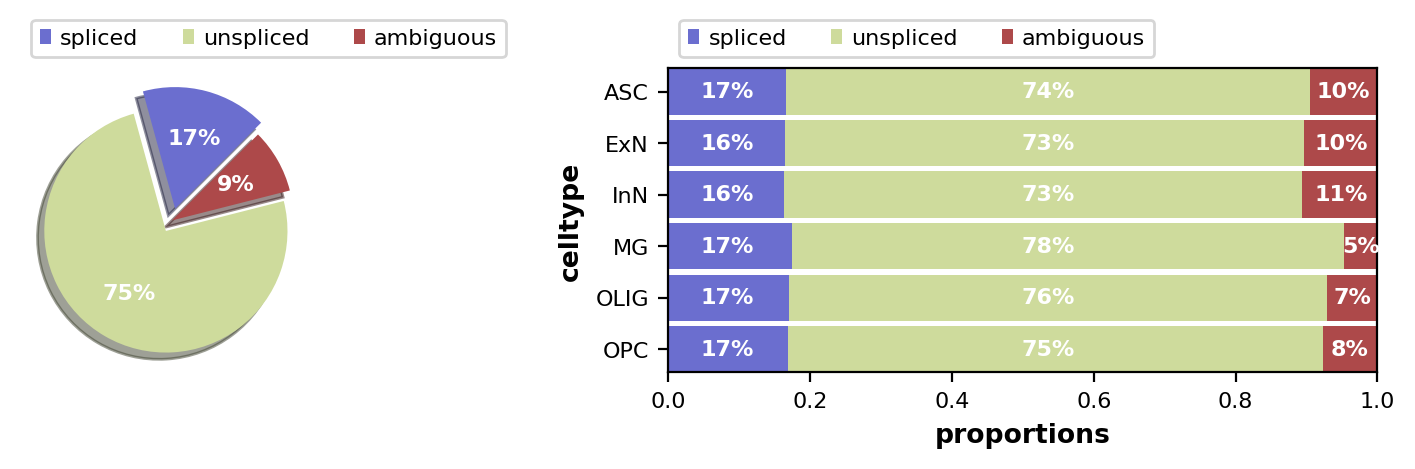

In [25]:
scv.pl.proportions(adata_rna, groupby='celltype',save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/all_6Controls_spliced.unpliced_proportions_SpeciesComparison_dPSIgenes.pdf' )

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_adata_rna_umap_SpeciesComparison_dPSI_genes.pdf


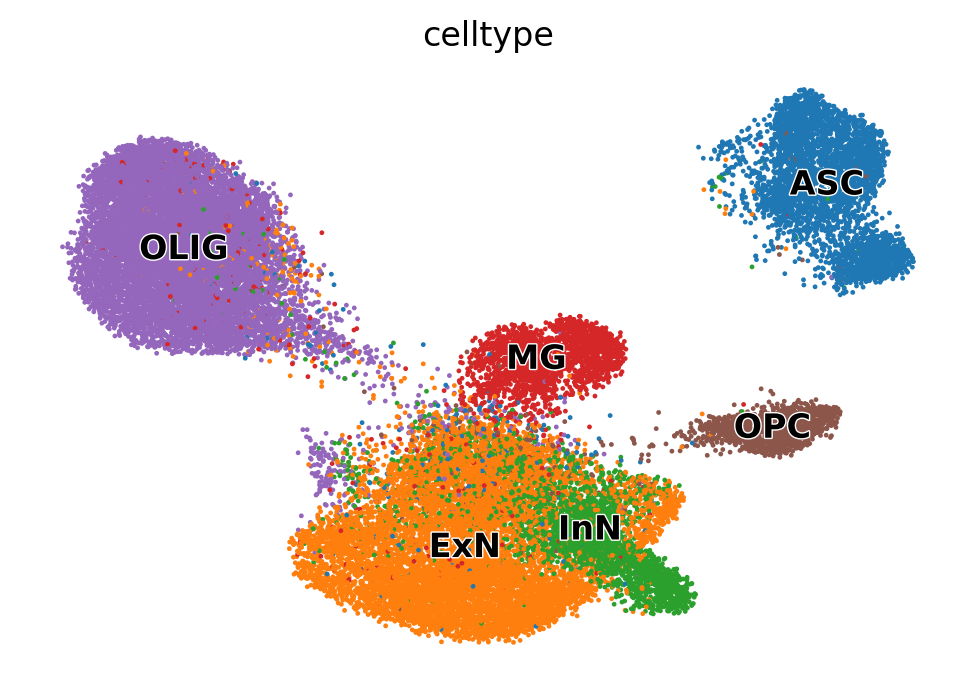

In [26]:
scv.tl.umap(adata_rna)
scv.pl.umap(adata_rna, color='celltype',save = "/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_adata_rna_umap_SpeciesComparison_dPSI_genes.pdf")

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_adata_rna_umap_SpeciesComparison_dPSI_genes_v2.pdf


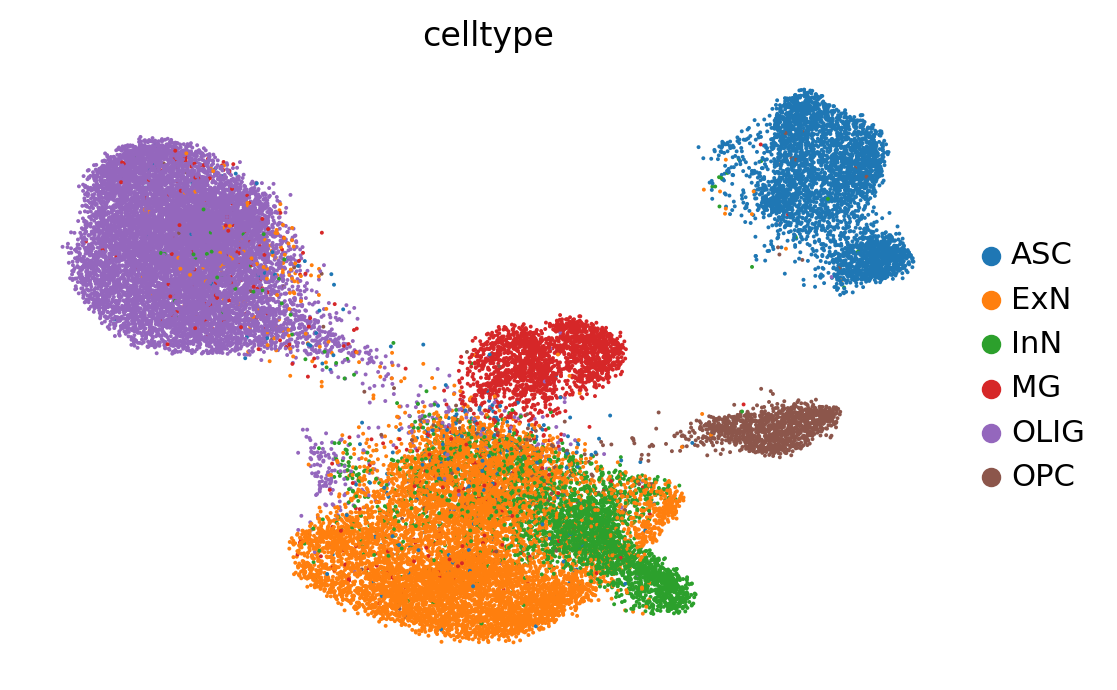

In [27]:
scv.pl.umap(adata_rna, color='celltype',size = 8, legend_loc='right margin',save = "/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_adata_rna_umap_SpeciesComparison_dPSI_genes_v2.pdf")

In [28]:
adata_rna.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_adata_rna.SpeciesComparison_dPSIgenes.celltype.filtered_normalized.h5ad')

In [29]:
# Read in Seurat WNN neighbors.
nn_idx = np.loadtxt("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/control_nn_idx.txt", delimiter=',')
nn_dist = np.loadtxt("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/control_nn_dist.txt", delimiter=',')
nn_cells = pd.Index(pd.read_csv("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/control_nn_cells.txt", header=None)[0])


In [30]:
np.all(nn_cells == adata_atac_all.obs_names)

True

In [31]:
adata_atac_all

AnnData object with n_obs × n_vars = 32625 × 15592
    obs: 'batch'

In [32]:
mv.knn_smooth_chrom(adata_atac_all, nn_idx, nn_dist)

In [33]:
shared_cells_new = pd.Index(np.intersect1d(adata_rna.obs_names, adata_atac_all.obs_names))

In [34]:
shared_cells_new

Index(['Gan60_AAACAGCCAATTTAGC-1', 'Gan60_AAACAGCCACGTGCTG-1',
       'Gan60_AAACATGCAATGAAGC-1', 'Gan60_AAACCAACAAAGCGCA-1',
       'Gan60_AAACCAACACTTCATC-1', 'Gan60_AAACCAACATTGGGAG-1',
       'Gan60_AAACCGAAGAAAGGAA-1', 'Gan60_AAACCGAAGATAGACG-1',
       'Gan60_AAACCGAAGCACGTTG-1', 'Gan60_AAACCGAAGCGCCTAA-1',
       ...
       'Gan66_TTTGTGGCATGTTTGG-1', 'Gan66_TTTGTGTTCAGTTCCC-1',
       'Gan66_TTTGTGTTCCCGCCTA-1', 'Gan66_TTTGTGTTCCGCAACA-1',
       'Gan66_TTTGTTGGTCAAACTG-1', 'Gan66_TTTGTTGGTCAGGCCA-1',
       'Gan66_TTTGTTGGTCTTGCAT-1', 'Gan66_TTTGTTGGTTACGCGG-1',
       'Gan66_TTTGTTGGTTGAAGCC-1', 'Gan66_TTTGTTGGTTGCATCT-1'],
      dtype='object', length=32205)

In [35]:
adata_atac = adata_atac_all[shared_cells_new, shared_genes]

In [36]:
adata_atac

View of AnnData object with n_obs × n_vars = 32205 × 2538
    obs: 'batch'
    layers: 'Mc'
    obsp: 'connectivities'

In [57]:
adata_atac.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_adata_atac.dPSIgenes.celltype.filtered_knn.smooth.h5ad')

In [7]:
### reload  assay
adata_atac = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_adata_atac.SpeciesComparison_dPSIgenes.celltype.filtered_knn.smooth.h5ad")

In [8]:
### reload rna assay
adata_rna = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_adata_rna.SpeciesComparison_dPSIgenes.celltype.filtered_normalized.h5ad")

In [37]:
adata_rna

AnnData object with n_obs × n_vars = 32205 × 2538
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [38]:
adata_atac

View of AnnData object with n_obs × n_vars = 32205 × 2538
    obs: 'batch'
    layers: 'Mc'
    obsp: 'connectivities'

In [39]:
# This will take a while. Parallelization is high recommended.
#mv.settings.VERBOSITY = 0
adata_result = mv.recover_dynamics_chrom(adata_rna,
                                         adata_atac,
                                         max_iter=5,
                                         init_mode="invert",
                                         parallel=True,
                                         save_plot=False,
                                         rna_only=False,
                                         fit=True,
                                         n_anchors=500,
                                         extra_color_key='celltype'
                                        )

/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/2538 [00:00<?, ?it/s]

Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed s

In [40]:
adata_result

AnnData object with n_obs × n_vars = 32205 × 2532
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'celltype_colors', 'velo_s_params', 'velo_u_params', 'velo_chrom_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'fit_anchor_c', 'fit_anchor_u', 'fit_anchor_s', 'fit_anchor_c_sw', 'fit_anchor_u_sw', 'fit_anchor_s_sw', 'fit_anchor_c_velo', 'fit_anchor_u_velo', 'fit_anchor_s_velo'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms',

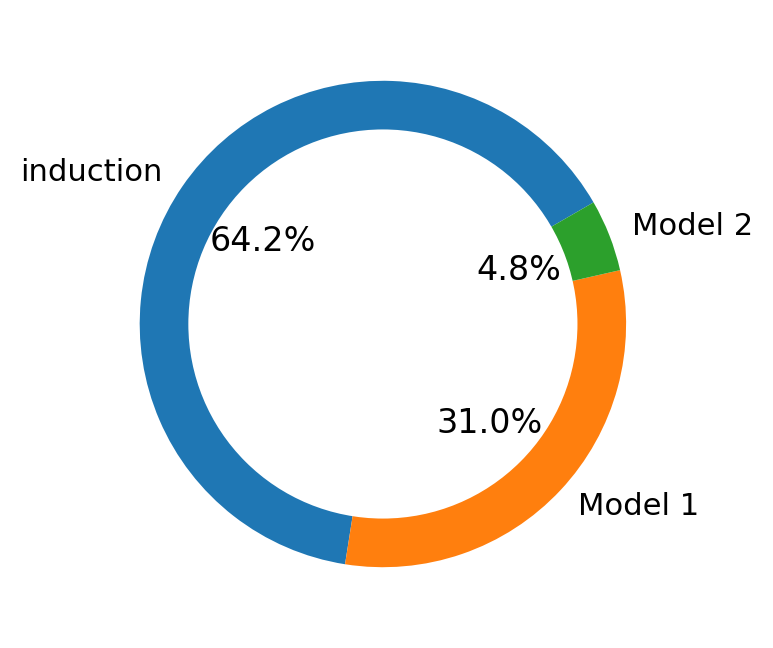

In [41]:
mv.pie_summary(adata_result)

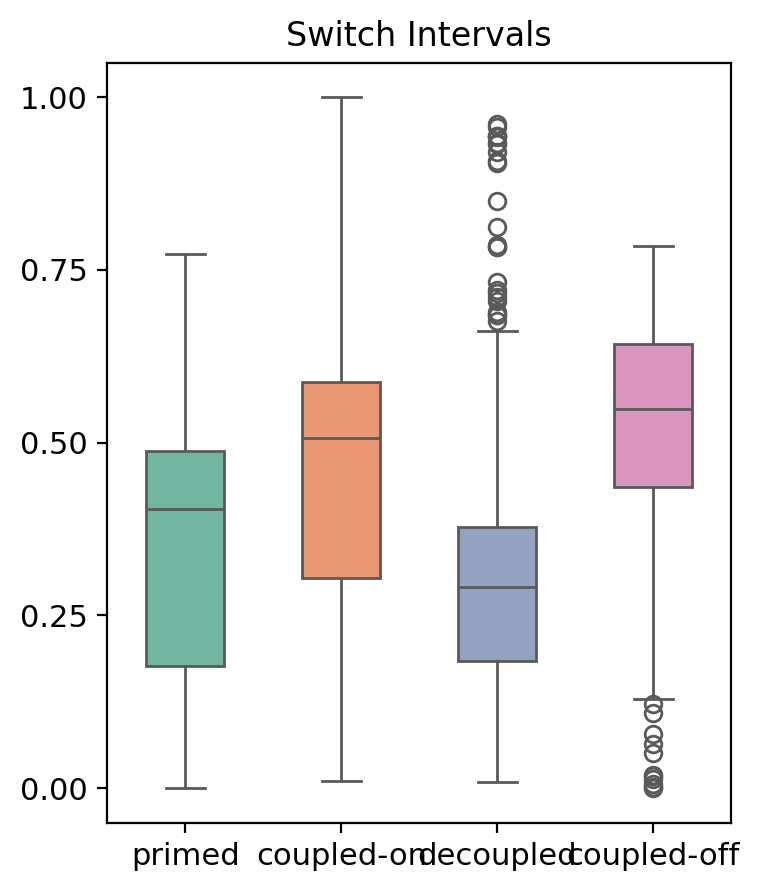

In [42]:
mv.switch_time_summary(adata_result)

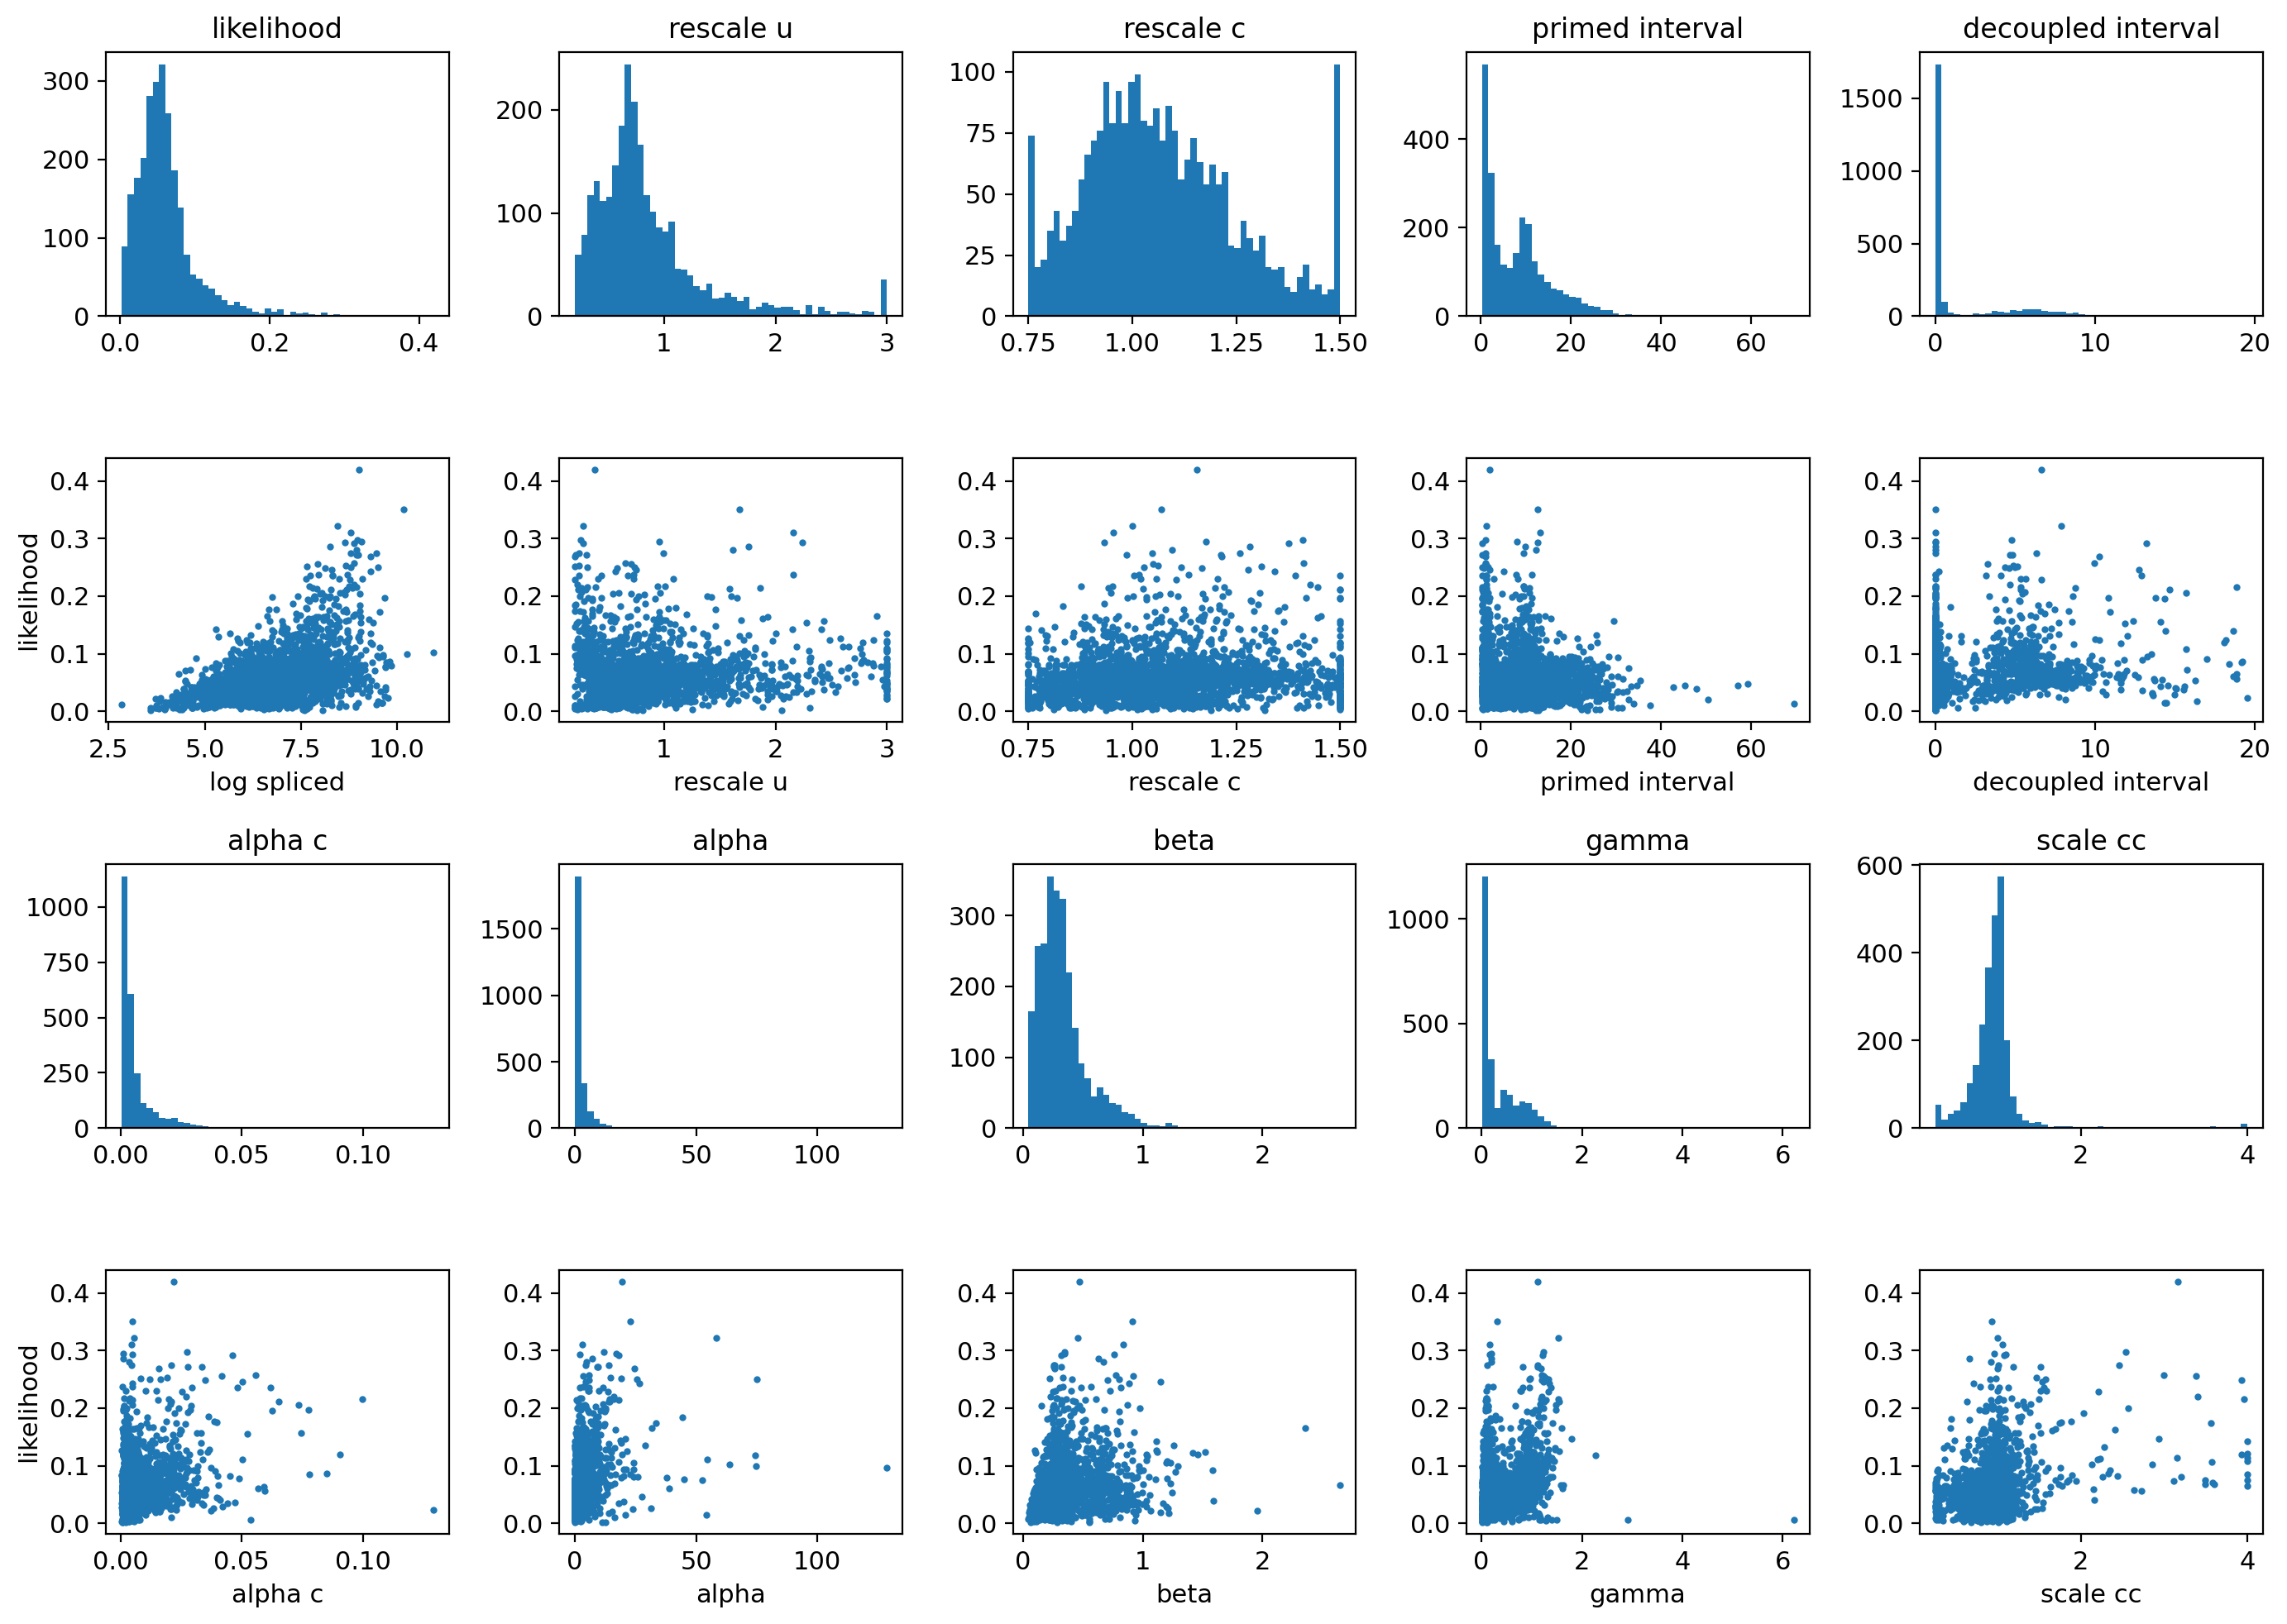

In [43]:
mv.likelihood_plot(adata_result)

In [44]:
#Computing velocity stream and latent time
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/56 cores)


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/32205 [00:00<?, ?cells/s]

    finished (0:01:10) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing terminal states
    identified 10 regions of root cells and 5 regions of end points .
    finished (0:01:12) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:08) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:08) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_multivelo_velocity_stream_SpeciesComparison_dPSItested_genes.png


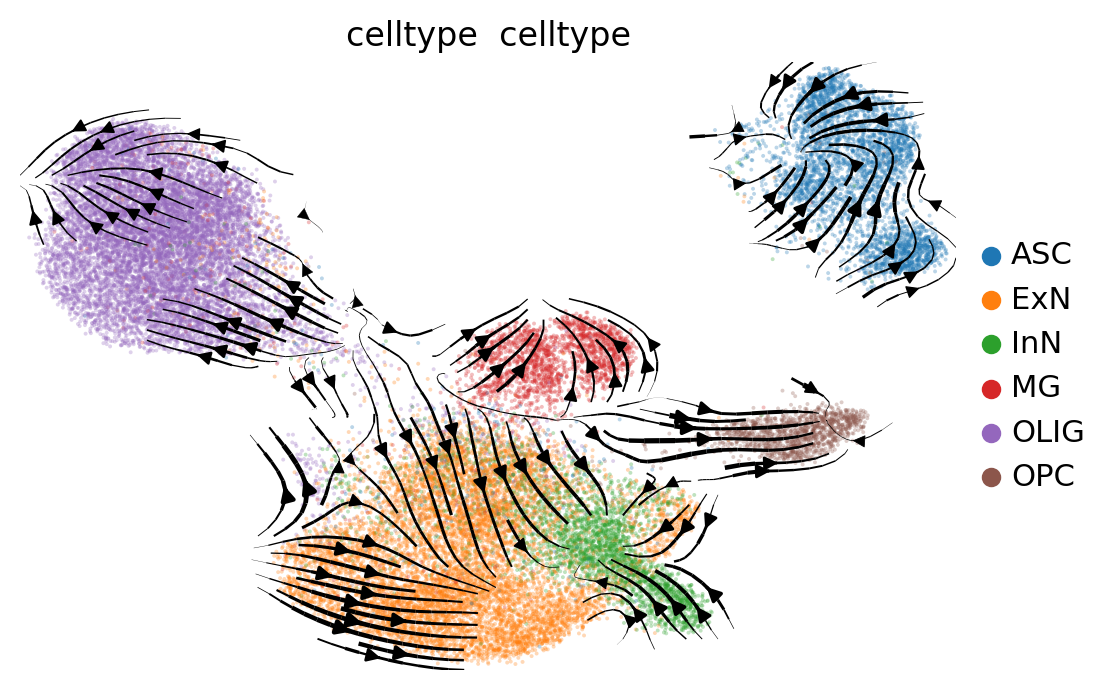

In [45]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='celltype',size = 8, legend_loc='right margin',layer='celltype', save = '/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_multivelo_velocity_stream_SpeciesComparison_dPSItested_genes.pdf')

In [46]:
### add sampleID 
adata_result.obs['sampleID'] = [x.split('_')[0][:] for x in adata_result.obs_names]
adata_result.obs['group'] = adata_result.obs['sampleID']

In [47]:
control_list=['Gan60','Gan61','Gan62','Gan63','Gan64','Gan66']
for x in control_list:
    adata_result.obs['group']=adata_result.obs['group'].replace(x,"Control")

In [48]:
adata_result.obs

,celltype,batch,n_counts,velo_s_norm_self_transition,root_cells,end_points,velo_s_norm_pseudotime,latent_time,sampleID,group
Gan60_AAACAGCCAATTTAGC-1,MG,0,147.000000,0.138781,0.035666,0.302105,0.613086,0.547958,Gan60,Control
Gan60_AAACAGCCACGTGCTG-1,ASC,0,147.000000,0.085136,0.048227,0.297700,0.517362,0.577696,Gan60,Control
Gan60_AAACATGCAATGAAGC-1,InN,0,147.000000,0.180634,0.046061,0.005294,0.811791,0.829687,Gan60,Control
Gan60_AAACCAACAAAGCGCA-1,InN,0,147.000015,0.106330,0.017801,0.161777,0.840817,0.842086,Gan60,Control
Gan60_AAACCAACACTTCATC-1,OLIG,0,146.999985,0.167901,0.041282,0.153818,0.076151,0.076552,Gan60,Control
...,...,...,...,...,...,...,...,...,...,...
Gan66_TTTGTTGGTCAGGCCA-1,OLIG,1,146.999939,0.102596,0.161704,0.026612,0.051697,0.033044,Gan66,Control
Gan66_TTTGTTGGTCTTGCAT-1,MG,1,146.999969,0.082293,0.193580,0.026333,0.623795,0.489114,Gan66,Control
Gan66_TTTGTTGGTTACGCGG-1,ExN,1,147.000000,0.115343,0.226575,0.009279,0.659231,0.617966,Gan66,Control
Gan66_TTTGTTGGTTGAAGCC-1,ExN,1,146.999969,0.201829,0.020276,0.631590,0.923575,0.968894,Gan66,Control


or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/56 cores)


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/32205 [00:00<?, ?cells/s]

    finished (0:01:07) --> added 
    'velo_chrom_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:08) --> added
    'velo_chrom_norm_umap', embedded velocity vectors (adata.obsm)


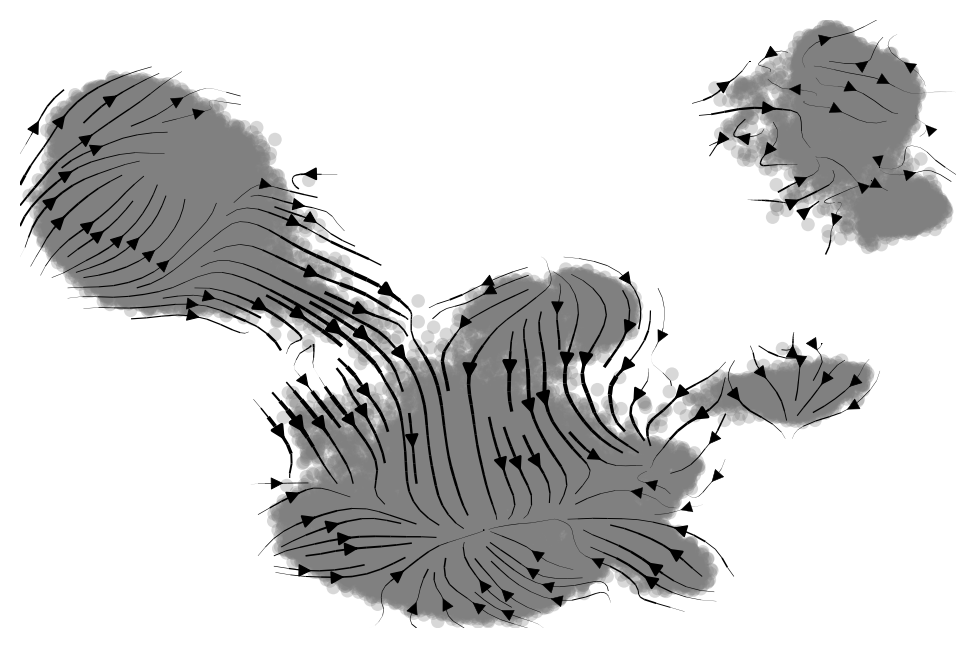

In [50]:
# velocity by atac
mv.velocity_embedding_stream(adata_result, basis='umap',vkey='velo_chrom')

figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_multivelo_ATAC_velocity_stream_SpeciesComparison_dPSItested_genes_byCelltype.png


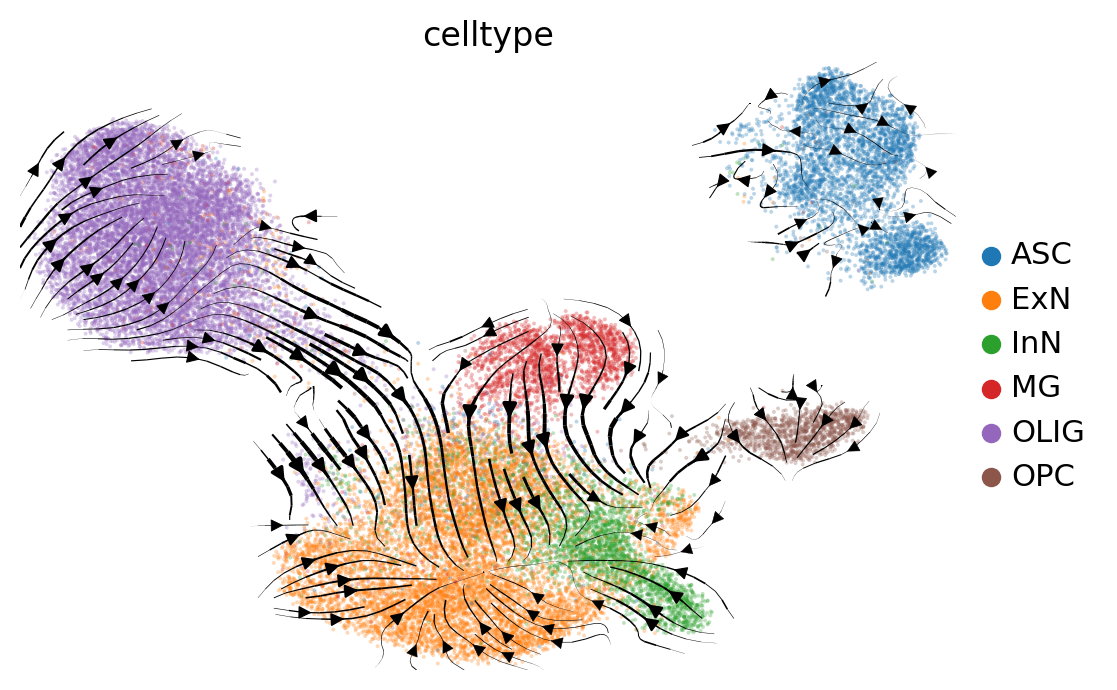

In [51]:
# plot velocity stream by velo_chrom
mv.velocity_embedding_stream(adata_result,color='celltype',size = 8, legend_loc='right margin', basis='umap',vkey='velo_chrom',save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_multivelo_ATAC_velocity_stream_SpeciesComparison_dPSItested_genes_byCelltype.pdf')

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_SpeciesComparison_latentTime.pdf


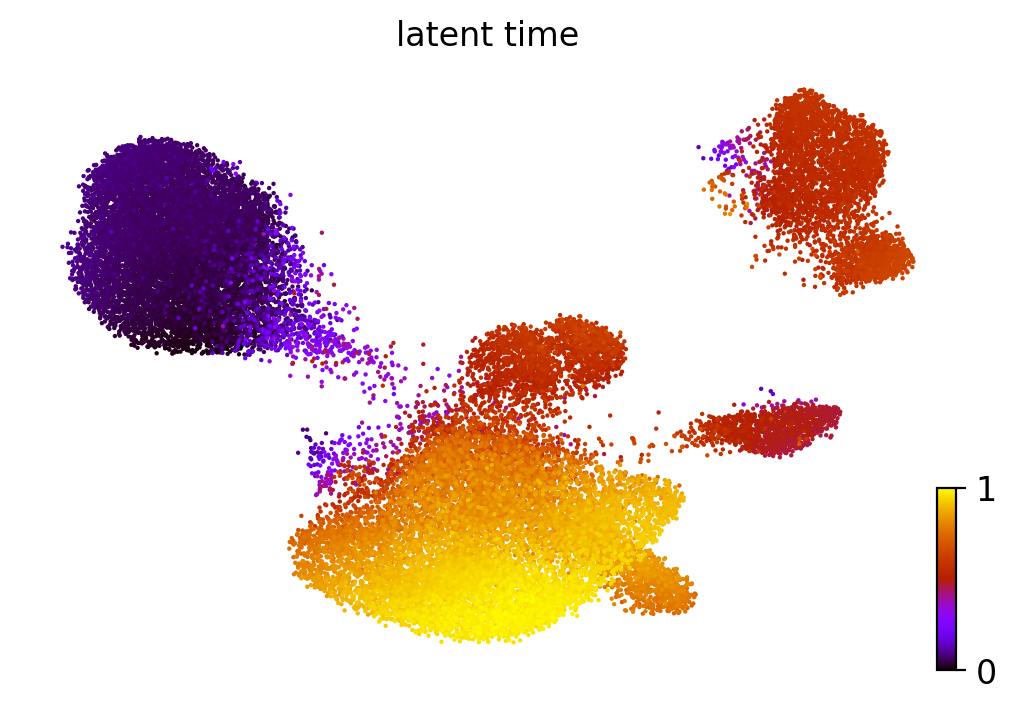

In [52]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=10,save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_SpeciesComparison_latentTime.pdf')

In [53]:
adata_result

AnnData object with n_obs × n_vars = 32205 × 2532
    obs: 'celltype', 'batch', 'n_counts', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time', 'sampleID', 'group', 'velo_chrom_norm_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes', 'velo_chrom_norm_genes'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'celltype_colors', 'velo_s_params', 'velo_u_params', 'velo_chrom_params', 'velo_s_norm_params', 'velo_s_norm_graph', 'velo_s_norm_graph_neg', 'samp

In [54]:
# Save the result for use later on
adata_result.write("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_multivelo_SpeciesComparison_dPSItestedGenes.h5ad")

In [10]:
### reload  assay
adata_result = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_multivelo_SpeciesComparison_dPSItestedGenes.h5ad")

In [11]:
adata_result

AnnData object with n_obs × n_vars = 32205 × 2532
    obs: 'celltype', 'batch', 'n_counts', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time', 'sampleID', 'group', 'velo_chrom_norm_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes', 'velo_chrom_norm_genes'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'pca', 'sampleID_colors', 'umap', 'velo_chrom_norm_graph', 'velo_chrom_norm_graph_neg', 'velo_chrom_norm_params', 'velo_chrom_params', 'velo_s_

In [55]:
unique_fit_model = set(adata_result.var['fit_model'])

In [56]:
unique_fit_model

{1.0, 2.0}

In [57]:
# get the model 1 genes
adata1 = adata_result[:, adata_result.var['fit_model'].values == 1]
# get the model 2 genes
adata2 = adata_result[:, adata_result.var['fit_model'].values == 2]

In [58]:
adata1.var

,Accession,Chromosome,End,Start,Strand,fit_alpha_c,fit_alpha,fit_beta,fit_gamma,fit_t_sw1,fit_t_sw2,fit_t_sw3,fit_scale_cc,fit_rescale_c,fit_rescale_u,fit_alignment_scaling,fit_model,fit_direction,fit_loss,fit_likelihood,fit_likelihood_c,fit_ssd_c,fit_var_c,fit_c0,fit_u0,fit_s0,fit_anchor_min_idx,fit_anchor_max_idx,fit_anchor_velo_min_idx,fit_anchor_velo_max_idx,velo_s_genes,velo_u_genes,velo_chrom_genes,velo_s_norm_genes,velo_chrom_norm_genes
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AACS,ENSG00000081760,12,125143333,125065434,+,0.001152,0.289118,0.174385,0.031150,-0.016156,20.044036,23.071161,0.915286,0.957820,1.112936,1.868914,1.0,on,0.028909,0.069185,0.264723,7000.131731,0.815006,0.015654,8.479115e-05,1.073329e-07,191.0,458.0,199.0,437.0,True,True,True,True,True
AAK1,ENSG00000115977,2,69674349,69457997,-,0.012259,12.561740,0.775295,1.028878,-0.010108,1.555091,5.438934,1.000000,1.133333,0.633969,1.063966,1.0,complete,0.012143,0.049005,0.262536,14277.438408,0.838185,0.017636,1.242841e-03,7.654716e-06,30.0,499.0,47.0,214.0,False,False,False,False,False
AATK,ENSG00000181409,17,81166221,81110487,-,0.002846,12.458060,0.709134,0.224371,9.697255,20.003165,20.748441,0.960026,1.091689,1.618932,1.037422,1.0,on,0.166856,0.071336,0.252153,9332.843328,0.901821,0.000000,0.000000e+00,0.000000e+00,0.0,481.0,136.0,467.0,True,True,True,True,True
ABAT,ENSG00000183044,16,8784575,8674596,+,0.031155,3.641612,0.169510,0.526127,-0.006327,0.674582,7.046744,1.283773,0.901375,0.279470,1.066239,1.0,complete,0.002641,0.070104,0.255690,9704.277238,0.857141,0.036446,2.596111e-04,4.972882e-07,31.0,499.0,47.0,419.0,True,True,True,True,True
ABCA5,ENSG00000154265,17,69327244,69244311,-,0.002457,1.106883,0.167538,0.068519,-0.053485,20.057154,22.190202,1.019361,0.995150,1.004049,1.438040,1.0,on,0.020966,0.077488,0.262887,11769.486082,0.822836,0.015935,9.437782e-04,4.206901e-06,114.0,461.0,123.0,452.0,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF83,ENSG00000167766,19,52690496,52594060,-,0.002431,0.060377,0.099359,0.021712,-0.054069,20.020639,23.565217,0.962310,0.905439,1.067499,2.169565,1.0,on,0.000131,0.018336,0.280969,3797.224987,0.697839,0.042601,1.633079e-04,4.109463e-07,228.0,458.0,244.0,448.0,False,False,False,False,False
ZNF875,ENSG00000181666,19,37369365,37312837,+,0.004112,0.055448,0.075569,0.741924,-0.001637,20.066988,74.330709,1.004062,0.989162,0.563142,3.929134,1.0,on,0.000044,0.007014,0.287468,2229.425360,0.687700,0.017144,8.858430e-07,9.727077e-11,27.0,154.0,54.0,153.0,False,False,False,False,False
ZRANB3,ENSG00000121988,2,135531218,135136916,-,0.004029,0.092206,0.073535,0.432176,-0.104606,20.066323,67.681159,1.060914,0.974379,0.629842,3.615942,1.0,on,0.000136,0.010738,0.259662,4861.331948,0.853461,0.018035,1.107653e-04,6.646538e-07,32.0,170.0,72.0,169.0,False,False,False,False,False


In [59]:
adata2.var

,Accession,Chromosome,End,Start,Strand,fit_alpha_c,fit_alpha,fit_beta,fit_gamma,fit_t_sw1,fit_t_sw2,fit_t_sw3,fit_scale_cc,fit_rescale_c,fit_rescale_u,fit_alignment_scaling,fit_model,fit_direction,fit_loss,fit_likelihood,fit_likelihood_c,fit_ssd_c,fit_var_c,fit_c0,fit_u0,fit_s0,fit_anchor_min_idx,fit_anchor_max_idx,fit_anchor_velo_min_idx,fit_anchor_velo_max_idx,velo_s_genes,velo_u_genes,velo_chrom_genes,velo_s_norm_genes,velo_chrom_norm_genes
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABI1,ENSG00000136754,10,26861087,26746593,-,0.003341,7.044263,0.253826,0.900764,-0.026459,20.028911,20.597826,0.750000,1.500000,0.225722,1.355978,2.0,complete,0.009663,0.085181,0.240061,7576.403106,0.842896,0.032333,9.019963e-04,1.331868e-05,120.0,488.0,131.0,467.0,True,True,True,True,True
ABLIM1,ENSG00000099204,10,114768061,114431113,-,0.003353,11.066806,0.710850,1.011418,2.215347,16.300476,18.730072,0.719757,1.406093,0.559598,1.657807,2.0,complete,0.006972,0.071623,0.248940,8123.962483,0.894734,0.000000,0.000000e+00,0.000000e+00,0.0,301.0,19.0,232.0,True,True,True,True,True
ABR,ENSG00000159842,17,1229738,1003518,-,0.008357,3.191514,0.920247,0.962104,7.395093,11.589736,15.394744,1.146895,0.750000,0.983796,1.000000,2.0,complete,0.002008,0.047683,0.216622,4150.128906,0.981465,0.000000,0.000000e+00,0.000000e+00,0.0,499.0,140.0,469.0,False,False,False,False,False
ACAP2,ENSG00000114331,3,195443044,195274745,-,0.004356,1.913558,0.522273,0.480887,-0.372986,20.007366,21.212121,0.805556,1.500000,0.825986,1.374656,2.0,complete,0.003820,0.054541,0.253432,14045.859309,0.911286,0.040483,1.404687e-02,1.594053e-03,114.0,477.0,148.0,454.0,True,True,True,True,True
ACSL1,ENSG00000151726,4,184826818,184755595,-,0.006367,8.126646,0.996527,1.358773,5.703105,11.529114,20.130887,1.046647,0.837420,0.736971,1.016293,2.0,complete,0.002573,0.053682,0.287141,1346.824060,0.565319,0.001736,0.000000e+00,0.000000e+00,8.0,499.0,186.0,459.0,True,True,True,True,True
ACTR2,ENSG00000138071,2,65271253,65227753,+,0.002761,9.102600,0.604928,0.735039,-0.025599,20.039307,20.703297,0.851126,1.340288,0.517021,1.096703,2.0,complete,0.028376,0.035291,0.253768,7232.742387,0.831795,0.004548,4.014138e-04,5.968271e-06,28.0,483.0,87.0,468.0,False,False,False,False,False
ACTR3,ENSG00000115091,2,113962596,113890063,+,0.007675,3.080461,0.963551,0.927234,-0.022704,20.031503,20.344086,0.991758,1.500000,0.738212,1.073118,2.0,complete,0.003272,0.022796,0.178053,7495.644470,1.284513,0.012819,4.320578e-04,6.358558e-06,26.0,491.0,65.0,446.0,False,False,False,False,False
ADD3,ENSG00000148700,10,110135565,109996368,+,0.006838,13.881619,0.758444,1.334970,-0.003669,11.182215,11.428908,0.953994,0.950185,0.732107,1.068522,2.0,complete,0.016105,0.128029,0.259776,12018.054672,0.812915,0.008863,3.468359e-04,6.580452e-07,32.0,499.0,97.0,492.0,True,True,True,True,True
AMD1,ENSG00000123505,6,110898879,110874770,+,0.004783,7.198904,0.713565,0.917024,-0.250619,12.754415,13.043233,1.070873,0.900463,0.701780,1.091904,2.0,complete,0.010824,0.103043,0.276755,11397.518296,0.762379,0.007881,9.478990e-03,1.123905e-03,42.0,499.0,74.0,467.0,True,True,True,True,True


In [60]:
adata1.obs.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_module1_genes_major.celltypes_SpeciesComparison_dPSItestedGenes_cells.txt', header=True, index=True)
adata1.var.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_module1_genes_major.celltypes_SpeciesComparison_dPSItestedGenes_variable_genes.txt', header=True, index=True)

In [61]:
adata2.obs.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_module2_genes_major.celltypes_SpeciesComparison_dPSItestedGenes_cells.txt', header=True, index=True)
adata2.var.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_module2_genes_major.celltypes_SpeciesComparison_dPSItestedGenes_variable_genes.txt', header=True, index=True)

In [62]:
all_cells = adata_result.obs.index

In [63]:
dPSI_filter_genes = adata_result.var.index

In [64]:
all_cells

Index(['Gan60_AAACAGCCAATTTAGC-1', 'Gan60_AAACAGCCACGTGCTG-1',
       'Gan60_AAACATGCAATGAAGC-1', 'Gan60_AAACCAACAAAGCGCA-1',
       'Gan60_AAACCAACACTTCATC-1', 'Gan60_AAACCAACATTGGGAG-1',
       'Gan60_AAACCGAAGAAAGGAA-1', 'Gan60_AAACCGAAGATAGACG-1',
       'Gan60_AAACCGAAGCACGTTG-1', 'Gan60_AAACCGAAGCGCCTAA-1',
       ...
       'Gan66_TTTGTGGCATGTTTGG-1', 'Gan66_TTTGTGTTCAGTTCCC-1',
       'Gan66_TTTGTGTTCCCGCCTA-1', 'Gan66_TTTGTGTTCCGCAACA-1',
       'Gan66_TTTGTTGGTCAAACTG-1', 'Gan66_TTTGTTGGTCAGGCCA-1',
       'Gan66_TTTGTTGGTCTTGCAT-1', 'Gan66_TTTGTTGGTTACGCGG-1',
       'Gan66_TTTGTTGGTTGAAGCC-1', 'Gan66_TTTGTTGGTTGCATCT-1'],
      dtype='object', length=32205)

In [65]:
dPSI_filter_genes

Index(['AACS', 'AAK1', 'AATK', 'ABAT', 'ABCA5', 'ABCB9', 'ABCC1', 'ABCC10',
       'ABCC8', 'ABCD3',
       ...
       'ZNF638', 'ZNF711', 'ZNF75A', 'ZNF790-AS1', 'ZNF83', 'ZNF875', 'ZRANB3',
       'ZSCAN18', 'ZSWIM7', 'ZYX'],
      dtype='object', name='Gene', length=2532)

In [66]:
all_cells = adata_result.obs.index
dPSI_filter_genes = adata_result.var.index
state_all = adata_result[:,dPSI_filter_genes].layers['fit_state']
state_all_df = pd.DataFrame(state_all)

In [67]:
state_all_df.index = all_cells
state_all_df.columns = dPSI_filter_genes

In [68]:
state_all_df

Gene,AACS,AAK1,AATK,ABAT,ABCA5,ABCB9,ABCC1,ABCC10,ABCC8,ABCD3,ABCE1,ABCG1,ABHD12,ABHD6,ABI1,ABI2,ABL2,ABLIM1,ABLIM2,ABLIM3,ABR,ABTB1,ACAA1,ACACB,ACADM,ACADSB,ACAP2,ACAP3,ACCS,ACD,ACER3,ACO2,ACOT8,ACOT9,ACOX1,ACOX3,ACSL1,ACSL3,ACTN1,ACTN2,ACTN4,ACTR2,ACTR3,ACTR3B,ACTR8,ACVR1C,ACVR2A,ADAM10,ADAM17,ADAM22,...,ZFAND1,ZFAND2A,ZFAND2B,ZFP62,ZFPM2,ZFYVE16,ZFYVE19,ZFYVE21,ZFYVE27,ZFYVE9,ZGRF1,ZMYM2,ZMYM4,ZMYM5,ZMYND8,ZNF121,ZNF142,ZNF189,ZNF207,ZNF226,ZNF227,ZNF248,ZNF25,ZNF276,ZNF277,ZNF283,ZNF302,ZNF326,ZNF334,ZNF33A,ZNF33B,ZNF37A,ZNF384,ZNF410,ZNF414,ZNF415,ZNF484,ZNF532,ZNF568,ZNF615,ZNF638,ZNF711,ZNF75A,ZNF790-AS1,ZNF83,ZNF875,ZRANB3,ZSCAN18,ZSWIM7,ZYX
Gan60_AAACAGCCAATTTAGC-1,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Gan60_AAACAGCCACGTGCTG-1,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Gan60_AAACATGCAATGAAGC-1,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Gan60_AAACCAACAAAGCGCA-1,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Gan60_AAACCAACACTTCATC-1,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gan66_TTTGTTGGTCAGGCCA-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Gan66_TTTGTTGGTCTTGCAT-1,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0

In [69]:
# save the state matrix, index = cellID, header = geneName
state_all_df.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_6Controls_multivelo_SpeciesComparison_dPSItestedGenes_Cell_States_mtx.csv')